In [1]:
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc
graphics_toolkit ("gnuplot");

Loading and Visualizing Data ...


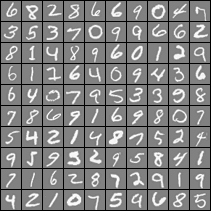

In [2]:
%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

displayData(sel);

In [3]:
%% ============ Part 2a: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.
%

% Test case for lrCostFunction
fprintf('\nTesting lrCostFunction() with regularization');

theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Testing lrCostFunction() with regularization
Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [4]:
%% ============ Part 2b: One-vs-All Training ============
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);


Training One-vs-All Logistic Regression...
Iteration    50 | Cost: 1.389914e-02
Iteration    50 | Cost: 5.725250e-02
Iteration    50 | Cost: 6.402885e-02
Iteration    50 | Cost: 3.636397e-02
Iteration    50 | Cost: 6.183455e-02
Iteration    50 | Cost: 2.172939e-02
Iteration    50 | Cost: 3.461963e-02
Iteration    50 | Cost: 8.587060e-02
Iteration    50 | Cost: 8.123523e-02
Iteration    50 | Cost: 1.008535e-02


In [5]:
%% ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 95.000000
